In [1]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

/Users/swayam/Desktop/deep-learning-v2-pytorch/venv/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [2]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [3]:
model = Classifier()

images, labels = next(iter(testloader))
# Get the class probabilities
ps = torch.exp(model(images))
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


In [4]:
ps

tensor([[0.1059, 0.1090, 0.0905, 0.0914, 0.0962, 0.0910, 0.0966, 0.1167, 0.0999,
         0.1028],
        [0.1021, 0.1031, 0.0924, 0.0918, 0.0993, 0.0891, 0.0965, 0.1202, 0.1016,
         0.1038],
        [0.1016, 0.1060, 0.0944, 0.0900, 0.0972, 0.0889, 0.1012, 0.1191, 0.1043,
         0.0973],
        [0.1030, 0.1062, 0.0937, 0.0910, 0.0960, 0.0913, 0.0983, 0.1170, 0.1029,
         0.1006],
        [0.1026, 0.1085, 0.0934, 0.0897, 0.0958, 0.0902, 0.1016, 0.1156, 0.1019,
         0.1007],
        [0.0997, 0.1060, 0.0933, 0.0891, 0.0968, 0.0886, 0.1031, 0.1184, 0.1037,
         0.1011],
        [0.1012, 0.1064, 0.0912, 0.0908, 0.0996, 0.0903, 0.0972, 0.1182, 0.1032,
         0.1019],
        [0.0998, 0.1029, 0.0945, 0.0930, 0.0989, 0.0900, 0.0960, 0.1180, 0.1059,
         0.1011],
        [0.1028, 0.1057, 0.0903, 0.0901, 0.0982, 0.0916, 0.0972, 0.1201, 0.1020,
         0.1021],
        [0.1023, 0.1042, 0.0918, 0.0905, 0.0976, 0.0923, 0.0987, 0.1179, 0.1035,
         0.1011],
        [0

In [5]:
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])

tensor([[7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7]])


In [6]:
equals = top_class == labels.view(*top_class.shape)

In [7]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 12.5%


In [8]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        ## TODO: Implement the validation pass and print out the validation accuracy
        total_correct = 0
        total_loss = 0
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model.forward(images)
                loss_test = criterion(log_ps, labels)
                total_loss += loss_test.item()

                ps = torch.exp(log_ps)
                top_i, top_class = ps.topk(1, dim=1)
                equal = top_class == labels.view(top_class.shape)
                correct = equal.sum().item()
                total_correct += correct

            test_loss = total_loss / len(testloader.dataset)
            train_loss = running_loss / len(trainloader.dataset)

            train_losses.append(train_loss)
            test_losses.append(test_loss)

            print(f"Echo: {e+1} || correct: {total_correct} || accuracy: {total_correct/len(testloader.dataset)}")

Echo: 1 || correct: 8268 || accuracy: 0.8268
Echo: 2 || correct: 8586 || accuracy: 0.8586
Echo: 3 || correct: 8608 || accuracy: 0.8608
Echo: 4 || correct: 8546 || accuracy: 0.8546
Echo: 5 || correct: 8639 || accuracy: 0.8639
Echo: 6 || correct: 8665 || accuracy: 0.8665
Echo: 7 || correct: 8731 || accuracy: 0.8731
Echo: 8 || correct: 8711 || accuracy: 0.8711
Echo: 9 || correct: 8726 || accuracy: 0.8726
Echo: 10 || correct: 8784 || accuracy: 0.8784
Echo: 11 || correct: 8738 || accuracy: 0.8738
Echo: 12 || correct: 8741 || accuracy: 0.8741
Echo: 13 || correct: 8803 || accuracy: 0.8803
Echo: 14 || correct: 8824 || accuracy: 0.8824
Echo: 15 || correct: 8810 || accuracy: 0.881
Echo: 16 || correct: 8661 || accuracy: 0.8661
Echo: 17 || correct: 8823 || accuracy: 0.8823
Echo: 18 || correct: 8820 || accuracy: 0.882
Echo: 19 || correct: 8849 || accuracy: 0.8849
Echo: 20 || correct: 8826 || accuracy: 0.8826
Echo: 21 || correct: 8808 || accuracy: 0.8808
Echo: 22 || correct: 8793 || accuracy: 0.8793

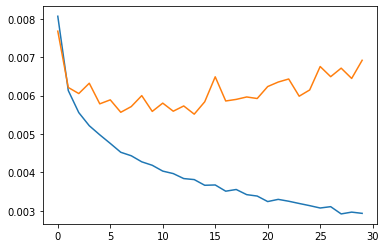

In [9]:
import matplotlib.pyplot as plt
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")

In [10]:
## TODO: Define your model with dropout added
class DropoutNetwork (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)

        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        x = x.view(x.shape[0],-1)

        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        out = F.log_softmax(self.fc4(x), dim=1)

        return out

In [11]:
## TODO: Train your model with dropout, and monitor the training progress with the validation loss and accuracy
model = DropoutNetwork()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30

test_losses, train_losses = [], []
for e in range(epochs):
    model.train() # activating dropout in train mode

    total_train_loss = 0
    for images, labels in trainloader:

        optimizer.zero_grad()

        log_ps = model.forward(images)
        loss = criterion(log_ps, labels)
        total_train_loss += loss.item()

        loss.backward()
        optimizer.step()

    else:
        model.eval() # turning off the dropout for validation
        total_test_loss = 0
        total_correct = 0
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model.forward(images)
                loss = criterion(log_ps, labels)
                total_test_loss += loss.item()

                ps = torch.exp(log_ps)
                top_i, top_class = ps.topk(1,dim=1)
                equal = top_class == labels.view(top_class.shape)
                total_correct += equal.sum().item()

            train_loss = total_train_loss / len(trainloader.dataset)
            test_loss = total_test_loss / len(testloader.dataset)

            train_losses.append(train_loss)
            test_losses.append(test_loss)
            
            print(f"Echo: {e+1} || correct: {total_correct} || accuracy: {total_correct/len(testloader.dataset)}")




Echo: 1 || correct: 8247 || accuracy: 0.8247
Echo: 2 || correct: 8379 || accuracy: 0.8379
Echo: 3 || correct: 8500 || accuracy: 0.85
Echo: 4 || correct: 8389 || accuracy: 0.8389
Echo: 5 || correct: 8447 || accuracy: 0.8447
Echo: 6 || correct: 8588 || accuracy: 0.8588
Echo: 7 || correct: 8623 || accuracy: 0.8623
Echo: 8 || correct: 8512 || accuracy: 0.8512
Echo: 9 || correct: 8662 || accuracy: 0.8662
Echo: 10 || correct: 8663 || accuracy: 0.8663
Echo: 11 || correct: 8632 || accuracy: 0.8632
Echo: 12 || correct: 8611 || accuracy: 0.8611
Echo: 13 || correct: 8649 || accuracy: 0.8649
Echo: 14 || correct: 8613 || accuracy: 0.8613
Echo: 15 || correct: 8686 || accuracy: 0.8686
Echo: 16 || correct: 8726 || accuracy: 0.8726
Echo: 17 || correct: 8574 || accuracy: 0.8574
Echo: 18 || correct: 8683 || accuracy: 0.8683
Echo: 19 || correct: 8665 || accuracy: 0.8665
Echo: 20 || correct: 8704 || accuracy: 0.8704
Echo: 21 || correct: 8769 || accuracy: 0.8769
Echo: 22 || correct: 8752 || accuracy: 0.8752

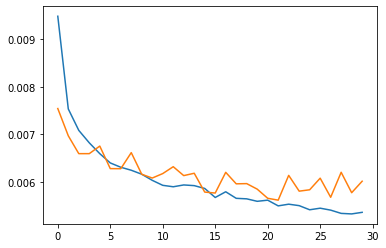

In [12]:
import matplotlib.pyplot as plt
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")